In [1]:
#Installations
!pip install nltk
!pip install texthero -U   
!pip install -U pyLDAvis

     |████████████████████████████████| 245kB 6.2MB/s 
     |████████████████████████████████| 1.4MB 8.3MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434679 sha256=b208577ab47c64cf0170383b24cc9beb6aceeccf6ee4234d0e15b34d4d3137cb
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.7MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=90821befd00fbeed7f5a86c1627a7f27da117fa3dcefc48f1436c9ada700ebc1
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re, nltk, spacy, gensim

#TextHero
import texthero as hero

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# TO upload & explore dataset to google colab
from google.colab import files
import io

# Exploring dataset
from texthero import preprocessing, stopwords

# Model Optimization
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



## Uploading & Exploring Dataset

In [3]:
# For running in Colab
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['DigitalEconomyDatasetTM.csv']))

Link to the custom dataset - https://drive.google.com/file/d/1OLTlHuhZPSW1XZo3F_FodxoP0WqcTtKT/view?usp=sharing

In [4]:
url = 'https://drive.google.com/file/d/1OLTlHuhZPSW1XZo3F_FodxoP0WqcTtKT/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.to_csv('DigitalEconomyDatasetTM.csv')

In [5]:
#df = pd.read_csv('DigitalEconomyDatasetTM.csv')
df.head()

,Authors,Title,Year,Abstract
0,"Nguyen Q.K., Dang Q.V.",Blockchain Technology - Opportunities for Emer...,2018,The recent major scientific conferences on the...
1,"Melnyk M., Korcelli-Olejniczak E., Chorna N., ...",Development of regional IT clusters in Ukraine...,2018,Introduction. Accelerated introduction of mode...
2,"Reisman R., Bertini M.",A novel architecture to monetize digital offer...,2018,As commerce continues to shift to the digital ...
3,"Bertola P., Teunissen J.",Fashion 4.0. Innovating fashion industry throu...,2018,Purpose: The on-going transition of societies ...
4,Moreno de la Santa J.G.-S.,The travel industry in 2018 – setting the scen...,2018,Purpose: The purpose of the paper is to identi...


In [6]:
df.shape

(2423, 4)

## Data Cleaning & Visualizing Frequent Words

In [7]:
df['Abstract'][10]

'Digital platforms have the ability to connect people, organizations and resources with the aim of facilitating the core interactions between businesses and consumers as well as assuring a greater efficiency for the business management. New business concepts, such as innovative start-ups, are therefore created based on innovation, scalability and the relationships within the community around them. The purpose of this work is to deeply understand the evolution of business models brought by innovative and dynamic companies operating through online platforms. In order to achieve the objectives set, an exploratory multiple-case study was designed based on in-depth structured interviews. The aim was to conduct a mixed analysis, in order to rely both on qualitative and quantitative data. The structured interview protocol was therefore designed to collect and then analyse data concerning the company profile and managers’ perspectives on the phenomenon of interest. The interview protocol was s

In [8]:
# Pre-processing Pipeling
custom_pipeline = [preprocessing.lowercase,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_urls]
data = hero.clean(df['Abstract'])

In [9]:
# Removing stop words
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["c","two", "results", "first", "datum", "research", "economic", "study", "data", "development", "result", "analysis", "model", 
                 "based", "using", "new", "market", "business", "system", "use", "city", "research", "paper", "finding", "user", "right", "issue", "also"])) ## Add as per requirement
data = hero.remove_stopwords(data, custom_stopwords )

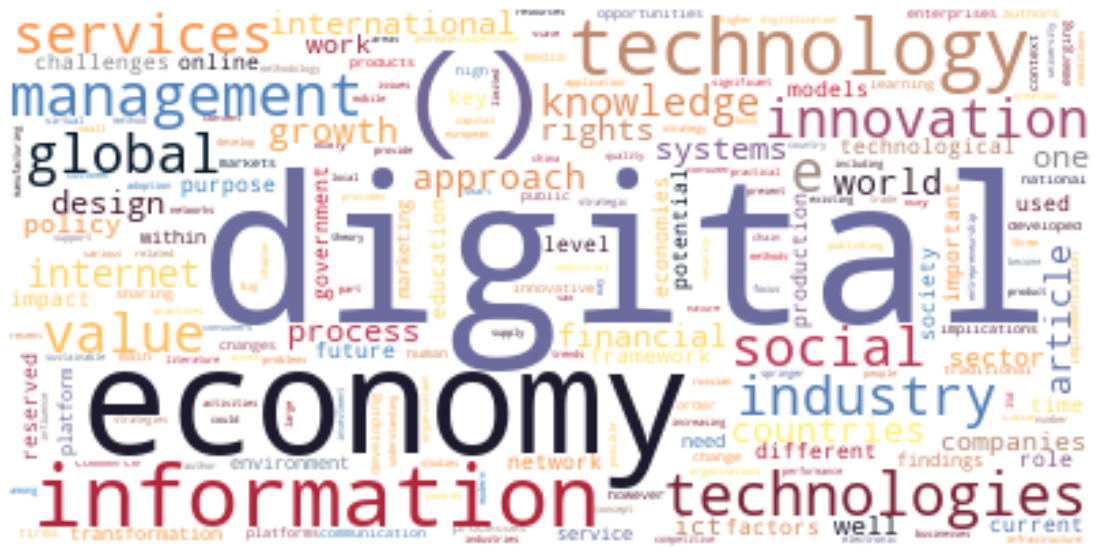

In [10]:
# Visualizing Stopwords
hero.visualization.wordcloud(data, font_path = None, width = 400, height = 200,
                             max_words=200, mask=None, contour_width=0, 
                             contour_color='PAPAYAWHIP',
                             background_color='WHITE', 
                             relative_scaling='auto', colormap=None,
                             return_figure=False)

In [11]:
type(data)

pandas.core.series.Series

In [12]:
#Alternate method using wordcloud library

#from wordcloud import WordCloud, STOPWORDS 
#import matplotlib.pyplot as plt
#d = str(df['Abstract'].tolist())
#w_cld = WordCloud(background_color='white').generate(d)
#plt.figure(figsize=(20,10))
#plt.imshow(w_cld, interpolation='bilinear')
#plt.axis("off")
#plt.show()

## Tokenization, Lemmatization & Word Matrix

In [13]:
# Tokenization - breaking down corpus into distinct terms/words
# This can be done using many ways - split functions, re expressions, 
# libraries like nltk, spacy, gensim, keras.
# See - https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

# Here, we use functions in gensim library
def sent_to_words(sentences):
  for sent in sentences:
    yield(gensim.utils.simple_preprocess(str(sent), deacc=True)) #deacc removes punctuations

In [14]:
data_words = list(sent_to_words(data))
print(data_words[:1])

[['recent', 'major', 'scientific', 'conferences', 'innovatube', 'frontier', 'ifs', 'focused', 'four', 'areas', 'pioneering', 'technologies', 'including', 'artificial', 'intelligence', 'internet', 'things', 'blockchain', 'augmented', 'reality', 'virtual', 'reality', 'blockchain', 'gained', 'lot', 'attention', 'technology', 'created', 'fever', 'bitcoin', 'ethereum', 'digital', 'coins', 'great', 'potentials', 'change', 'nature', 'real', 'world', 'everyone', 'lives', 'various', 'studies', 'blockchain', 'however', 'reality', 'percentage', 'people', 'understand', 'blockchain', 'remain', 'minute', 'highlight', 'important', 'role', 'blockchain', 'technology', 'future', 'world', 'especially', 'developing', 'countries', 'ieee']]


In [16]:
# Lemmatization- reducing a word to its root form. This too can be done using various methods
# See - https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/

# Here, we will use functions of the spaCy library
def lemmatization(texts, allowed_postags=['NOUN','ADJ','VERB','ADV']):
  """https://spacy.io/api/annotation"""
  texts_out = []
  for sent in texts:
      doc = nlp(" ".join(sent)) 
      texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))      
  return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adjective, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['recent major scientific conference focus area pioneer technology include artificial intelligence internet thing blockchain augment reality virtual reality blockchain gain lot attention technology create fever bitcoin ethereum coin potential change nature real world live various study blockchain however reality percentage people understand remain minute highlight important role blockchain technology future world especially develop country', 'introduction accelerate introduction modern technology area country social economy national information infrastructure integration global information space improvement information security condition strategic objective society furthermore recent year characterise active creation network organisation form cluster cooperation sphere joint endeavour company scientific educational establishment actor organisation cluster contribute optimisation process management course creation introduction information technologie product service company form powerfu

In [17]:
# Loading word-document matrix - Vectorization of Lemmatized words

# Vectorizer is used to convert raw documents to document-term matrix (dtm)

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum number occurences of a word required
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}')  # num of characters > 3

In [18]:
# This is needed because LDA model only inputs array-like or sparse document term matrix 

# Sparse matrix for LDA
data_vectorized = vectorizer.fit_transform(data_lemmatized)

## Building LDA Model with Sci-kit Learn

In [19]:
# Build LDA model with Sklearn

lda_model = LatentDirichletAllocation(n_components=15,              # Number of topics
                                      max_iter=10,                   # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,              # Random state
                                      batch_size=128)                # n docs in each learning iter
                                            
lda_output = lda_model.fit_transform(data_vectorized)                                      

  # Model attributes

In [20]:
print(lda_model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [21]:
# Evaluating Model Quality
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp((-1) * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Log Likelihood:  -1404097.4383608396
Perplexity:  1083.6200155939055


In [22]:
# Visualizing model by plotting latent themes and the associated words

# pyLDAvis package extracts information from a fitted LDA topic model to inform an interactive web-based visualization

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
13     114.344879  114.308296       1        1  35.254957
8      105.821045  -93.749626       2        1  10.302847
12    -138.334473   95.320763       3        1  10.096490
9       -7.436697  111.259697       4        1   8.897518
10    -207.550629 -105.472603       5        1   7.966353
0       52.817650   14.603765       6        1   6.984692
11     168.010849    6.806950       7        1   5.372250
6      -94.169601 -157.789551       8        1   3.670135
7     -122.849174  -39.059418       9        1   3.478780
4      -94.894264  195.408295      10        1   2.454072
14      24.927401 -180.464874      11        1   2.333828
1      -53.413467   26.832108      12        1   2.068456
2      -12.255850  -72.093201      13        1   0.525981
5     -224.217957   28.070581      14        1   0.355971
3       36.154255  209.427582      15        1   0.237670, topic_info=            Term         Freq        Total Category  logprob  loglift
857         firm   581.000000   581.000000  Default  30.0000  30.0000
1060    industry  1137.000000  1137.000000  Default  29.0000  29.0000
1118    internet   707.000000   707.000000  Default  28.0000  28.0000
1497    platform   763.000000   763.000000  Default  27.0000  27.0000
1245  management   821.000000   821.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1059   industrie     0.070307    10.022922  Topic15  -8.8235   1.0823
1078  initiation     0.070313    10.114051  Topic15  -8.8235   1.0733
1123   interview     0.718722   133.626943  Topic15  -6.4989   0.8167
327         come     0.677794   126.132263  Topic15  -6.5576   0.8158
1019      impact     1.038372   556.682165  Topic15  -6.1310  -0.2423

[886 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5         4  0.145160       abuse
5         5  0.798383       abuse
12        1  0.127820  acceptance
12        7  0.858223  acceptance
13        1  0.047151      access
...     ...       ...         ...
2236     12  0.003606        year
2239      2  0.200957       youth
2239      3  0.080383       youth
2239     14  0.683255       youth
2240      3  0.914002        zone

[2781 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 9, 13, 10, 11, 1, 12, 7, 8, 5, 15, 2, 3, 6, 4])

In [23]:
# Saving visualization as .html file
pyLDAvis.save_html(panel, 'lda_panel.html')

In [24]:
# Saving .html as .jpg
#!pip install imgkit
#!sudo apt-get install wkhtmltopdf
#import imgkit
#imgkit.from_file('lda_panel.html', 'lda_panel.jpg')

**Analysis**

*   Each of the 15 bubbles represent a topic. The larger the bubble, the higher percentage of the number of 'abstracts' in the corpus is about that topic. Since there is no overlap b/w bubbles, therefore topics are distinct from one another. 
*   We can also see that the contribution of the first 4-5 bubbles is the most when building the entire model. 
*   Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.

*P.S. - Word Counts are illustrated when model created using gensim.*

*   Red bars give the estimated number of times a given term was generated by a given topic. As we can see from the image above, there are about 22,000 of the word ‘digital’, and this term is used about 10,000 times within topic 1. **The word with the longest red bar is the word that is used the most by the 'abstracts' belonging to that topic.**

Key Terms -

*   **Saliency**: A metric used to identify most informative or useful words for identifying topics in the entire collection of texts. Higher saliency values indicate that a word is more useful for identifying a specific topic. 
*   **Relevance**: A metric used for ranking terms within topics. It helps identify the most relevant words within a given topic. It reflects the level at which a word belongs to a certain topic at the exclusion of other topics. It uses the parameter **λ** to weigh the probability of a term within a topic.
*   **Lambda**: Adjusting λ slider to values close to 0 highlights potentially rare but more exclusive terms for the selected topic. Larger λ values (closer to 1) highlight more frequently occurring terms in the document that might not be exclusive to the topic.



When evaluating the model, we see that topics 14 & 15 are not very constructive when it comes to representing the overall frequency of each word and the estimated no. of times each word is generated by a topic. 

**Therefore, we must try to build a more robust, better fit model by tuning the hyperparameters.**

## Grid Search for Model Optimization
---
May require high computational resources and the complete execution of the code may take longer.



In [25]:
%%time

# Define Search Param
params = {'n_components': [10,15,20,25,30], 'learning_decay':[0.5, 0.7, 0.9]}

# Model
lda = LatentDirichletAllocation()

# Grid Search
model = GridSearchCV(lda, param_grid=params)

# Perform Grid Search
model.fit(data_vectorized)

CPU times: user 17min 33s, sys: 14.1 s, total: 17min 48s
Wall time: 17min 33s


In [26]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -309703.69498900545
Model Perplexity:  1051.2452277718223


## Visualizing the Top N-words of the Best Model
---
Having optimized the model does not guarantee the **human interpretebaility** of the topics. We will now visualize the topics and try to interpret them.


In [27]:
#Visualize with pyLDAvis along with the best parameters

pyLDAvis.enable_notebook()
panel1 = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, 
                                 vectorizer, mds = 'tsne')
panel1

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  20.014738
9       0.648955  71.707100       2        1  14.295599
2      71.019684   9.971006       3        1  14.060709
7       3.785981  33.185135       4        1  12.605224
5     -42.666500  -9.222070       5        1  10.321884
3      -3.621689 -43.526516       6        1   7.347993
4      -3.632402  -4.171708       7        1   7.001539
8     -36.584400  35.804413       8        1   6.436828
1      44.391380  50.615383       9        1   4.896067
0      40.235809 -31.591665      10        1   3.019418, topic_info=            Term        Freq        Total Category  logprob  loglift
459      country  920.000000   920.000000  Default  30.0000  30.0000
1497    platform  744.000000   744.000000  Default  29.0000  29.0000
2035         tax  233.000000   233.000000  Default  28.0000  28.0000
1501      policy  709.000000   709.000000  Default  27.0000  27.0000
941   government  565.000000   565.000000  Default  26.0000  26.0000
...          ...         ...          ...      ...      ...      ...
457         cost   27.257724   356.762046  Topic10  -5.4053   0.9284
887    framework   27.662674   422.600006  Topic10  -5.3905   0.7738
1398      online   27.603632   446.632049  Topic10  -5.3926   0.7163
569      digital   31.936875  3057.049826  Topic10  -5.2468  -1.0613
1036     include   27.490053   549.634127  Topic10  -5.3968   0.5047

[678 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         1  0.957294  abstract
5         5  0.868474     abuse
5        10  0.072373     abuse
13        1  0.109542    access
13        2  0.486092    access
...     ...       ...       ...
2238      1  0.046280     young
2238      2  0.663353     young
2238      6  0.185122     young
2238      8  0.061707     young
2238      9  0.030854     young

[2614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 3, 8, 6, 4, 5, 9, 2, 1])

In [28]:
# Saving visualization as .html file
pyLDAvis.save_html(panel1, 'best_lda_panel.html')

In [29]:
# Show top n keywords for each topic
def show_topics(vectorizer, model, n_words):
  keywords = np.array(vectorizer.get_feature_names())
  topic_keywords = []
  for topic_weights in model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:n_words]
    topic_keywords.append(keywords.take(top_keyword_locs))
  return topic_keywords

topic_keywords = show_topics(vectorizer, best_lda_model, 10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,tax,tourism,policy,economy,taxation,corporate,energy,income,transport,country
Topic 1,economy,digital,customer,online,value,content,space,brand,platform,medium
Topic 2,economy,digital,technology,information,process,article,management,method,problem,author
Topic 3,economy,digital,firm,social,technology,capital,human,innovation,value,change
Topic 4,platform,industry,price,high,effect,value,firm,economy,increase,impact
Topic 5,country,economy,policy,government,digital,trade,develop,ict,law,internet
Topic 6,technology,knowledge,design,management,digital,information,network,economy,service,develop
Topic 7,technology,economy,digital,industry,innovation,financial,change,sector,technological,bank
Topic 8,economy,work,share,worker,platform,peer,digital,social,practice,article
Topic 9,service,digital,economy,consumer,internet,information,marketing,technology,global,social


Thus, we have illustrated the top 10 words best representative of each of the 10 topics in a matrix format.